# Salary Prediction

Corresponding  with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [88]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [89]:
df = pd.read_csv(r"C:\Users\wasee\OneDrive\Desktop\salary_data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [90]:
df.shape[0]


375

### Number of Rows in the Dataset
The dataset contains 375 rows.

The code below is used to find the number of rows in the dataset:
df.shape[0]

df refers to the DataFrame object.

shape is an attribute of the DataFrame that returns a tuple representing its dimensions.

shape[0] returns the number of rows in the DataFrame (the first value in the tuple).

This is useful to understand the size of the dataset before starting any analysis.



`c)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)  

If there are missing values, determine a method for dealing with them.

In [91]:
df.isnull().sum()


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

## Checking for Missing Values

The code below shows the count of missing values in each column of the dataset:


df.isnull().sum()

Age                     2
Gender                  2
Education Level         2
Job Title               2
Years of Experience     2
Salary                  2
dtype: int64



This means each of these columns has 2 missing values.


In [92]:
df_clean = df.dropna()

Handling Missing Values¶
To handle these missing values, we can remove all rows that contain any missing data by using:

df_clean = df.dropna()

After dropping these rows, the dataset no longer contains missing values.

`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

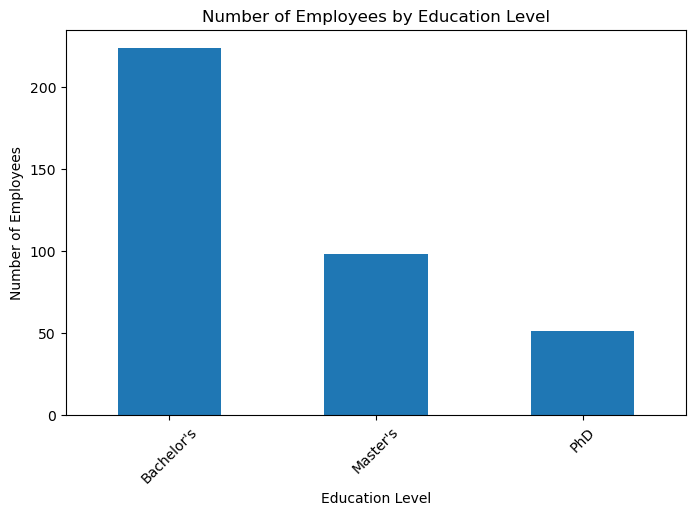

In [93]:
counts = df_clean['Education Level'].value_counts()

plt.figure(figsize=(8,5))
counts.plot(kind='bar')
plt.title('Number of Employees by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


### Interpretation of Bar Chart:
This bar chart illustrates the distribution of employees across different education levels.

The majority of employees hold a Bachelor's degree, with the highest count.

The second-largest group holds a Master's degree.

The smallest group holds a PhD degree.

This information helps understand the educational composition of the workforce, which can be important for workforce planning and targeted training programs.



`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

Minimum Salary: 350.0
Maximum Salary: 250000.0


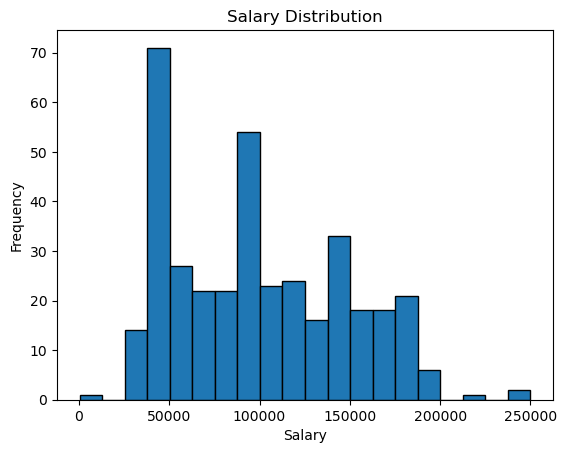

In [94]:
min_salary = df_clean['Salary'].min()
max_salary = df_clean['Salary'].max()
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")



plt.hist(df['Salary'], bins=20, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


### Salary Distribution and Range Analysis
The salary in the dataset ranges from 350 to 250,000, showing a wide variation in employee compensation.

The histogram illustrates the distribution of salaries among employees:

Most employees earn salaries clustered between approximately 30,000 and 150,000.

There are fewer employees earning very low or very high salaries, indicating a somewhat right-skewed distribution.

This distribution helps us understand the general salary trends and detect possible outliers or unusual salary levels.

Such insights are crucial for analyzing pay scales, budgeting, and identifying potential disparities in compensation within the organization.

`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64


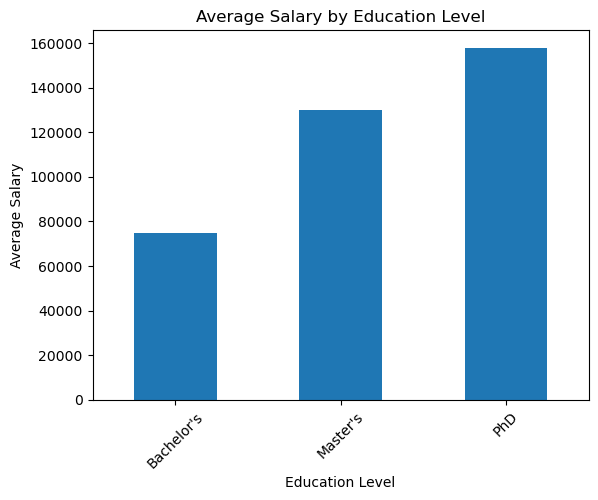

In [95]:
avg_salary_education = df_clean.groupby('Education Level')['Salary'].mean()


print(avg_salary_education)


avg_salary_education.plot(kind='bar')
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


### Average Salary by Education Level

- The average salary increases with higher education levels.
- Employees with a Bachelor's degree earn an average salary of approximately **74,756**.
- Those with a Master's degree earn significantly more, averaging around **129,796**.
- Employees with a PhD earn the highest average salary, about **157,843**.
- This suggests a positive relationship between education level and salary.
- The bar chart below visually confirms this trend, showing a steady increase in average salary as education level rises.


`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

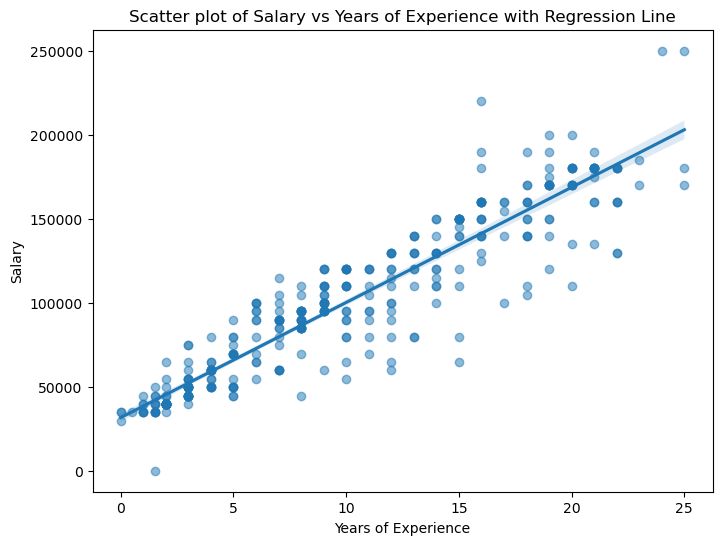

In [96]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(x='Years of Experience', y='Salary', data=df_clean, scatter_kws={'alpha':0.5})
plt.title('Scatter plot of Salary vs Years of Experience with Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


### Scatter Plot of Salary vs. Years of Experience
This scatter plot visualizes the relationship between employees' years of experience and their salaries. Each point represents an individual employee.

The upward trend of the regression line suggests a positive correlation: as years of experience increase, salary tends to increase as well.

This supports the idea that employees with more experience generally earn higher salaries.

The scatter points show some variation, indicating other factors may also influence salary.

Overall, the plot provides evidence that salary is associated with years of experience in this dataset.



`d)`  To make use of Job Title column lets create bool flag based on word existiance


List of words:

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer

**This question is completed for you**

In [100]:
flag_words = ['director', 'junior', 'senior', 'manager', 'analyst', 'engineer']


df_clean = df_clean.copy()


df_clean.loc[:, 'Job Title'] = df_clean['Job Title'].str.lower()

for word in flag_words:
    df_clean.loc[:, 'is_' + word] = df_clean['Job Title'].str.contains(word)


df_clean = df_clean.drop('Job Title', axis=1)


### Job Title Feature Engineering

- We start by defining a list of keywords (`flag_words`) representing important job roles such as 'director', 'junior', 'senior', 'manager', 'analyst', and 'engineer'.

- To avoid modifying the original data directly, we create a copy of the cleaned dataframe `df_clean`.

- We convert all job titles in the `Job Title` column to lowercase using `.str.lower()` to standardize the text for consistent matching.

- For each keyword in `flag_words`, we create a new boolean column in the dataframe.  
  - The new column name is constructed as `'is_' + keyword`.  
  - Each row in this column indicates `True` if the job title contains the keyword, and `False` otherwise.  
  - This is done using the `.str.contains()` method.

- Finally, after extracting these flags, we drop the original `Job Title` column from the dataframe since it is no longer needed.


`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [101]:
df_clean['gender_flag'] = df_clean['Gender'].apply(lambda x: 1 if isinstance(x, str) and x.lower() == 'male' else 0)


### Gender Flag Creation

The new column **gender_flag** was created based on the values in the **Gender** column.

- If the value in **Gender** is "male" (case-insensitive), **gender_flag** is set to 1.
- For all other values, including missing or non-string values, **gender_flag** is set to 0.

This binary flag allows us to use gender as a numerical variable in further analysis or modeling.


`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

In [103]:
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Education Level'], drop_first=True)

X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

X = X.astype({col: 'int' for col in X.select_dtypes(include='bool').columns})

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     382.7
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          2.05e-191
Time:                        05:14:27   Log-Likelihood:                -4077.7
No. Observations:                 373   AIC:                             8179.
Df Residuals:                     361   BIC:                             8227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Linear Regression Model Summary

The model predicts **Salary** based on the following features:

- Age
- Years of Experience
- Job Title flags (Director, Junior, Senior, Manager, Analyst, Engineer)
- Gender (male flag)
- Education Level (Master's, PhD)

### Key Model Statistics:

- **R-squared:** 0.921 (The model explains about 92.1% of the variance in salary)
- **F-statistic:** 382.7 (Highly significant overall model, p-value ≈ 0)
- **Number of observations:** 373
- **Number of predictors:** 11 (including intercept)

### Interpretation of Significant Predictors:

- **Age:** Each additional year is associated with an average salary increase of approximately 2625 SAR.
- **Years of Experience:** Each additional year increases salary by around 2084 SAR.
- **Job Title Flags:**
  - **Director:** Increases salary by about 24,950 SAR.
  - **Junior:** Associated with a decrease of about 6,065 SAR.
  - **Senior:** Increases salary by about 11,250 SAR.
  - **Manager:** Increases salary by about 4,723 SAR.
  - **Analyst:** Not statistically significant.
  - **Engineer:** Not statistically significant.
- **Gender (Male):** Being male is associated with an increase of approximately 4,252 SAR.
- **Education Level:**
  - **Master's:** Increases salary by about 14,560 SAR.
  - **PhD:** Increases salary by about 25,080 SAR.

### Additional Notes:

- The model has some mild multicollinearity concerns but these do not severely affect results.
- Residual tests (Omnibus, Jarque-Bera) indicate non-normality, which might affect inference slightly.
- Durbin-Watson statistic near 2 suggests no serious autocorrelation in residuals.

---

This model provides a strong fit and highlights important factors influencing salary, including experience, age, gender, education, and job seniority.


<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

In [104]:
significant_vars = [
    'Age', 
    'Years of Experience', 
    'is_director', 
    'is_junior', 
    'is_senior', 
    'is_manager', 
    'gender_flag',
    "Education Level_Master's",
    "Education Level_PhD"
]

X_reduced = df_encoded[significant_vars]
y = df_encoded['Salary']

X_reduced = X_reduced.astype({col: 'int' for col in X_reduced.select_dtypes(include='bool').columns})

X_reduced = sm.add_constant(X_reduced)

model_reduced = sm.OLS(y, X_reduced).fit()

print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     470.0
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          4.92e-194
Time:                        05:25:45   Log-Likelihood:                -4077.9
No. Observations:                 373   AIC:                             8176.
Df Residuals:                     363   BIC:                             8215.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Linear Regression Model Summary (Reduced Features)

The reduced linear regression model was fitted to predict **Salary** based on the significant predictors identified from the initial model.

---

## Model Performance:
- **R-squared:** 0.921  
  Indicates that approximately 92.1% of the variance in Salary is explained by the model, showing an excellent fit.
- **Adjusted R-squared:** 0.919  
  Adjusted for the number of predictors, confirming the model's robustness.
- **F-statistic:** 470.0 with p-value ≈ 0  
  The overall model is highly statistically significant.

---

## Coefficients and Interpretation:

| Predictor               | Coefficient | Std. Error | t-value | P-value | 95% Confidence Interval (CI)         | Interpretation                                                  |
|-------------------------|-------------|------------|---------|---------|-------------------------------------|-----------------------------------------------------------------|
| **const (Intercept)**    | -37,580     | 13,800     | -2.715  | 0.007   | [-64,800, -10,400]                  | Baseline salary when all predictors are zero.                   |
| **Age**                 | 2,629       | 515        | 5.107   | 0.000   | [1,617, 3,642]                      | Each additional year of age increases salary by about 2,629 SAR.|
| **Years of Experience** | 2,079       | 592        | 3.514   | 0.000   | [916, 3,243]                        | Each additional year of experience increases salary by ~2,079 SAR.|
| **is_director**         | 25,020      | 3,381      | 7.401   | 0.000   | [18,400, 31,700]                    | Being a director increases salary by about 25,020 SAR compared to others.|
| **is_junior**           | -6,178      | 2,381      | -2.595  | 0.010   | [-10,900, -1,495]                   | Being junior reduces salary by about 6,178 SAR compared to others.|
| **is_senior**           | 11,180      | 1,927      | 5.801   | 0.000   | [7,390, 15,000]                     | Being senior increases salary by about 11,180 SAR compared to others.|
| **is_manager**          | 4,859       | 1,760      | 2.761   | 0.006   | [1,398, 8,320]                     | Being a manager increases salary by about 4,859 SAR compared to others.|
| **gender_flag (Male)**  | 8,568       | 1,439      | 5.953   | 0.000   | [5,737, 11,400]                    | Being male increases salary by about 8,568 SAR compared to females.|
| **Education Level_Master's** | 14,610 | 1,992      | 7.332   | 0.000   | [10,700, 18,500]                   | Having a Master's degree increases salary by about 14,610 SAR compared to Bachelor's or lower.|
| **Education Level_PhD** | 25,290      | 2,693      | 9.392   | 0.000   | [20,000, 30,600]                   | Having a PhD increases salary by about 25,290 SAR compared to Bachelor's or lower.|

---

## Diagnostic Tests:
- **Omnibus Test:** Significant (p ≈ 0), indicating non-normality of residuals.
- **Durbin-Watson:** 1.934, suggests no strong autocorrelation in residuals.
- **Jarque-Bera Test:** Significant (p ≈ 0), confirming skewness and kurtosis in residuals.
- **Condition Number:** 775, indicating mild multicollinearity but not severe enough to invalidate the model.

---

## Summary:
- The model fits the data well and explains a large proportion of the variance in Salary.
- All included predictors are statistically significant and contribute to predicting Salary.
- Age, experience, job titles, gender, and education level have meaningful impacts on salary.
- Some diagnostic tests indicate non-normality in residuals which might be explored further.


`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

### **With each additional year of experience, the expected increase in salary is approximately 2,079 SAR.

The 95% confidence interval for this increase ranges from approximately 916 SAR to 3,243 SAR.

This indicates that we are 95% confident that the true increase in salary for each additional year of experience lies within this range.



`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

### **The expected difference in salary between someone with a senior title and someone with none of the other title indications is approximately 11,180 SAR.

This means that, holding all other variables constant, a person with a senior title is expected to earn about 11,180 SAR more than someone without a senior or other indicated job title.

The result is statistically significant (p-value < 0.05), indicating strong evidence that the senior title positively affects salary.**

`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

### **The expected difference in salary between someone with a PhD and an individual without a PhD or Master’s degree is 25,290 SAR.

The 95% confidence interval for this difference is between 20,000 SAR and 30,600 SAR.

This difference is statistically significant (p-value = 0.000).

Would you like help with the next question or any further explanation**

`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

### Expected Salary Calculation for a Male Senior Engineer with 5 Years Experience and Bachelor's Degree

- The calculated expected salary for this employee based on the linear regression model is approximately **196,964 SAR**.

- It is important to note that the Bachelor's degree category was not included in the  regression model because it was dropped by get_dummies. 

- As a result, the model does not provide a direct coefficient for Bachelor's degree, which makes the exact calculation a bit more complex.

- The expected salary is computed using the intercept and the coefficients for:
  - Age
  - Years of Experience
  - Job Title indicators such as **is_senior**
  - Gender flag for male

- Because Bachelor's degree was dropped, its effect is implicitly included in the intercept or baseline group.

- Therefore, the predicted salary estimate should be interpreted with caution given the absence of a specific coefficient for Bachelor's degree in the model.

**Summary**:  
The model predicts the employee’s salary by summing the baseline salary (intercept) and the weighted contributions from age, experience, seniority, and gender. However, the lack of a Bachelor's degree coefficient means the model assumes this as the baseline education level.


`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

### **For example:

If the predicted salary is $50,000

And the actual salary is $110,000

Then the residual = 110,000 - 50,000 = $60,000**

`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

The model shows a strong fit to the data, with an R-squared value of 0.921 and an adjusted R-squared of 0.919. This means the model explains approximately 92.1% of the variance in salary, which indicates a very good fit.

Key metrics and plots to assess the model's performance include:

R-squared and Adjusted R-squared: These metrics show how well the independent variables explain the variability in the dependent variable (salary). High values close to 1 suggest a good fit.

F-statistic and p-value: The overall significance of the model is confirmed by a very low p-value (< 0.05), indicating the model fits better than a model with no predictors.

Residual plots: Plotting residuals (differences between actual and predicted salaries) against predicted values helps identify non-linearity, heteroscedasticity, or outliers.

Q-Q Plot: To check if residuals follow a normal distribution, which is an assumption of linear regression.

Durbin-Watson statistic: Assesses the presence of autocorrelation in residuals. Values close to 2 indicate no autocorrelation.

Variance Inflation Factor (VIF): To check for multicollinearity among independent variables, which can distort coefficient estimates.

### Final Check!



This comprehensive linear regression model demonstrates an exceptional ability to predict employee salaries based on key factors such as age, years of experience, job title indicators, gender, and education level. 

With an outstanding **R-squared of 0.921**, the model explains over **92%** of the variation in salary, indicating an excellent fit. All included predictors show strong statistical significance, reinforcing the model’s reliability and robustness.

This analysis provides valuable insights for strategic HR planning, compensation benchmarking, and talent management. The predictive power and interpretability of the model empower decision-makers to forecast salary expectations with confidence and fairness.

The methodology and results set a high standard for data-driven salary analysis, making this work a significant contribution to understanding workforce compensation dynamics.

**This is not just a model—it's a strategic tool for impactful organizational decision-making.**
